# Методические рекомендации по выполнению курсовой работы по дисциплине "Системы управления базами данных"

**<u>Содержание задания</u>**


**Курсовая работа состоит из 3 разделов. Ниже представлена их характеристика, а также основные требования.**

1. **Анализ предметной области, построение концептуальной модели.**
2. **Нормализация, построение даталогической модели.**
3. **Построение физической модели (написание запросов на создание таблиц), создание экранных форм для заполнения реляционных таблиц (написание запросов на добавление данных в таблицы - заполнить целевые таблицы базы данных не менее 7 записями каждую), построение типовых запросов к базе данных на выборку данных:**
    - **по одному запросу с использованием LIKE, BETWEEN, IN**;
    - **3 запроса с использованием агрегирующих функций SUM, AVG, COUNT**;
    - **4 запроса со связанными таблицами WHERE, INNER JOIN, LEFT JOIN, RIGHT JOIN**;
    - **2 запроса, включающих в себя подзапросы.**
  
**В курсовой работе необходимо использовать справочную, нормативно-правовую документацию соответствующей предметной области, различные литературные источники по построению реляционных баз данных (всего не менее 20 наименований).**

Рассмотрим выполнение курсовой работы на примере: *Построение базы данных для обеспечения функционирования информационной системы по предоставлению государственной услуги "Запись в кружки, спортивные секции, дома творчества"*

Продемонстрируем содержание каждого из разделов.

## Раздел 1. Анализ предметной области, построение концептуальной модели

Предоставление услуги "Запись в кружки, спортивные секции и дома творчества" является типовой услугой, предоставляемой на портале https://mos.ru в электронной форме. На рисунке 1 показана экранная форма получения данной услуги:

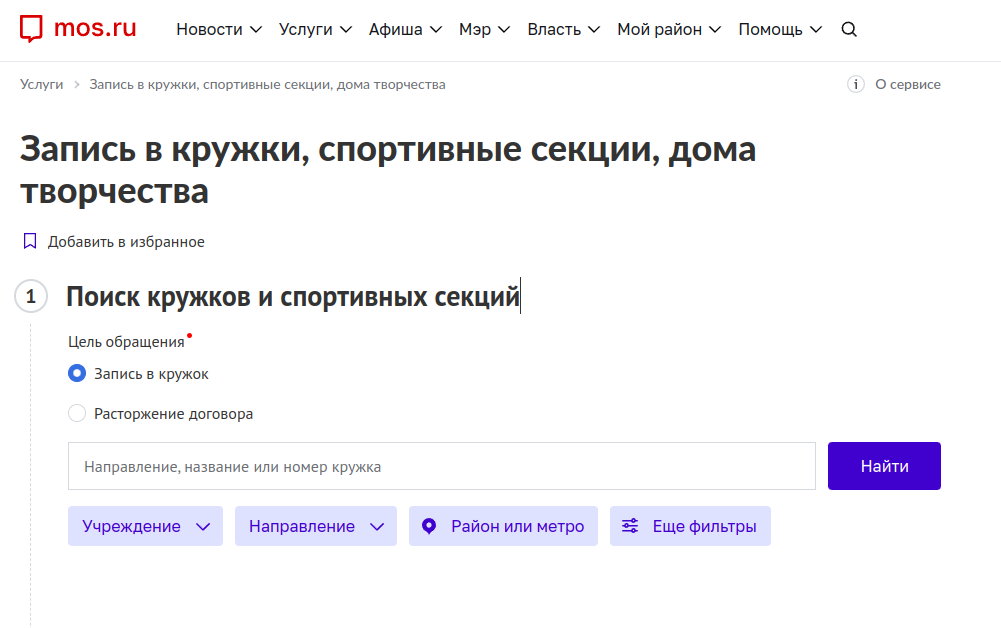

Рисунок 1. - Экранная форма получения услуги



Как следует из рисунка 1, существует два варианта поиска услуги: для записи в кружок, для расторжения договора по уже предоставляемой услуге. 

Для получения услуги записи в кружок в поисковом поле необходимо найти интересующую услугу. Для этой цели услугу можно искать по названию учреждения или направлению обучения, также имеется возможность поиска услуги по территориальной локации.

Ниже на рисунке 2 представлен скриншот поиска услуги по заданному направлению:

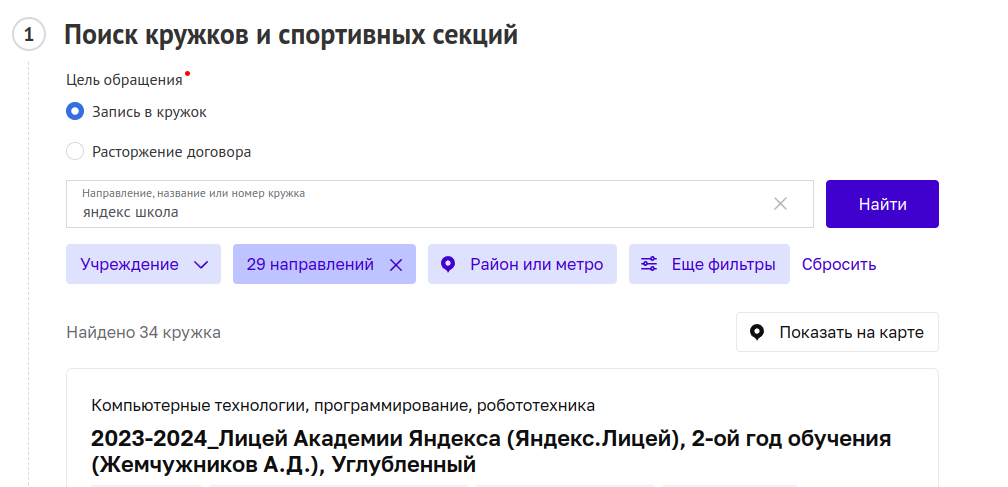

Рисунок 2. - Поиск услуги по заданному направлению

Как видно из рисунка 2, по названию "яндекс школа" найдено 34 различных кружка.

На следующем рисунке 3 показан пример предоставления услуги при поиске по организации, предоставляющей услугу.

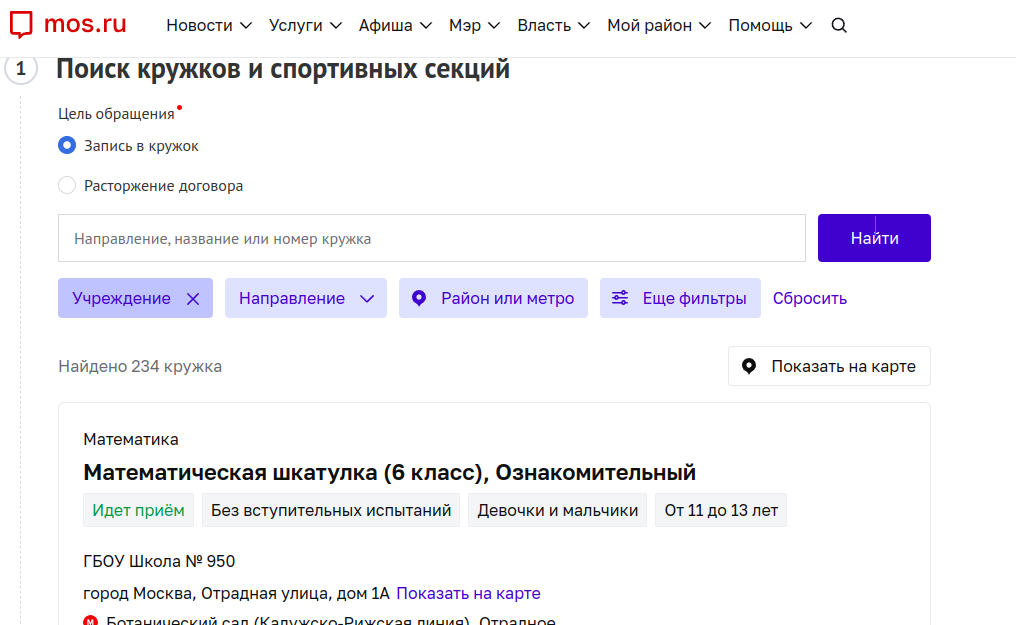

Рисунок 3. - Поиск услуги по организации

Как видно из рисунков, сама услуга имеет привязку к организации, к адресу. Услуга имеет название, статус (идет прием, идет обучение), условия поступления (без вступительных экзаменов, собеседование), возрастные ограничения, режим оплаты (платно, бесплатно).

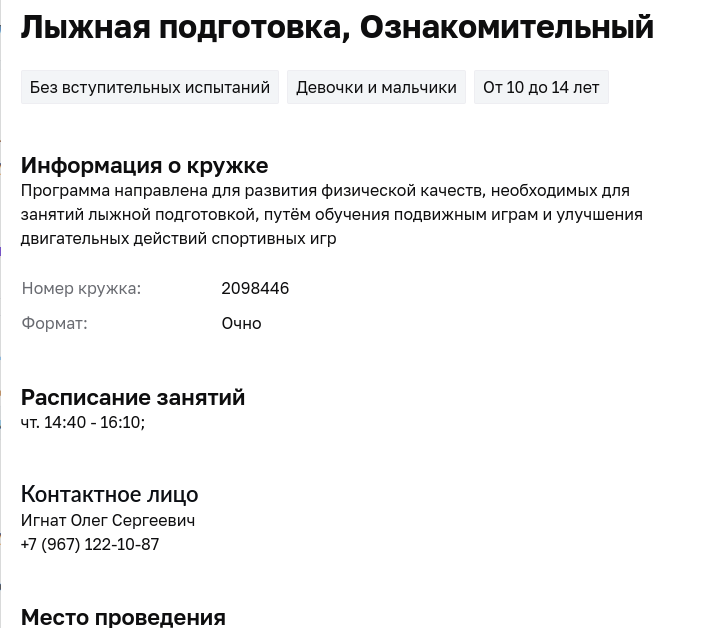

Рисунок 4. - Детализация услуги

При подробной детализации услуги, показанной на рисунке 4, видны также следующие атрибуты:
- номер кружка;
- формат (очный, заочный, дистанционный);
- расписание занятий;
- Контактное лицо, его телефон;
- Место проведения.

При выборе режима "Расторжение договора" по профилю авторизованного пользователя происходит поиск всех заключенных договоров, после чего предоставляется сервис расторжения договора с указанием даты и причины. 
    
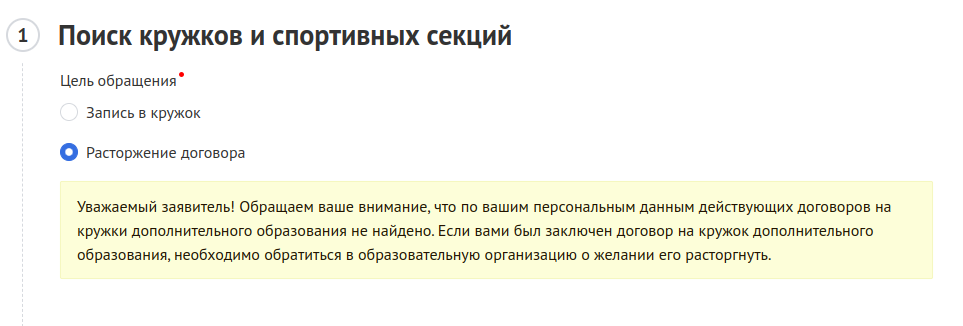

Рисунок 5. - Расторжение договора

Таким образом, при получении услуги законный представитель ребенка (родитель) должен заключить договор с указанием вида услуги, срока предоставления услуги, режимов оплаты услуги, обязанностей и ответственности сторон.

После анализа предметной области перейдем к построению концептуальной модели в нотации Питера Чена. Для этого выделим основные сущности в рассматриваемой предметной области, их атрибуты, а также их возможные связи друг с другом.

Итак, работа по предоставлению услуги начинается с авторизации пользователя на сайте mos.ru. Значит выделяется сильная сущность "Родитель". У родителя будем учитывать следующий состав атрибутов: фамилия, имя, отчество, дата рождения, паспортные данные, логин, пароль (хотя сам пароль в базе данных обычно не хранится (хранится хэш пароля), мы сделаем упрощение).

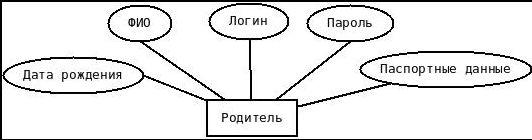

Рисунок 6. - Сущность "Родитель"

У родителя может быть несколько детей, причем каждому ребенку может быть оказана услуга записи в разные кружки, поэтому выделяется еще одна сущность  - "ребенок". Поскольку в нашей информационной системе ребенок привязан к родителю, сущность ребенок оказывается слабой. Выделим следующий состав ее атрибутов: фамилия, имя, отчество, дата рождения, пол.

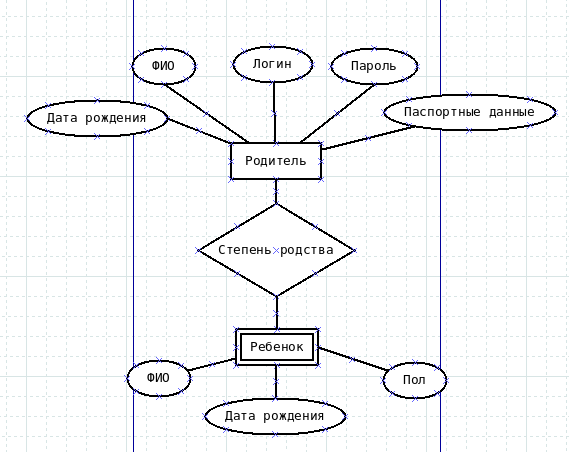

Рисунок 7. - Сущности "Родитель", "Ребенок"

Конечно, центральной сущностью в данной предметной области оказывается сужность "Кружок". Однако сам по себе "Кружок" не может существовать без организации (учреждения), на базе которой он проводится, также кружок зависит и от контактного лица. То есть сущность кружок является слабой сущностью. Сущность "Организация" является сильной сущностью, выделим в ней следующие атрибуты: Название, адрес, контактный телефон. Само контактное лицо, которое по факту предоставляет услугу (ведет кружок) может быть сотрудником организации, на базе которой проводится кружок, или может быть приглашенным сотрудником. Поскольку в явном виде эта информация не отображается в информационной системе, мы для упрощения не будем рассматривать взаимосвязь между контактным лицом и организацией. У контактного лица нас будут интересовать фамилия, имя, отчество, телефон.

Сущность "Кружок"  включает в себя следующий состав атрибутов: номер кружка, название кружка,  статус, условия поступления, возрастные ограничения, формат, расписание занятий. Также между сущностями "Кружок" - "Организация", "Кружок" - "Контактное лицо" определяются связи.

Соответствующий фрагмент концептуальной модели представлен на рисунке 8.

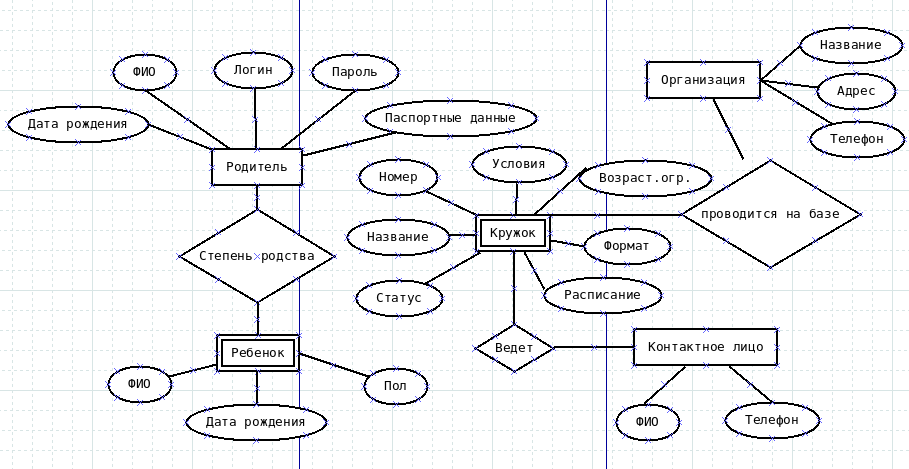

Рисунок 8. - Сущности "Кружок", "Организация", "Контактное лицо"


Наконец, между сущностями "Родитель" и "Кружок" возникает связь - родитель заключает договор на предоставление услуг (записывает ребенка в кружок), в свою очередь, ребенок, записанный в кружок, проходит обучение в кружке. Таким образом, выделяется слабая сущность "Договор", в которой можно выделить следующие атрибуты: Номер договора, дата подписания договора, режим оплаты договора, дата окончания действия договора.

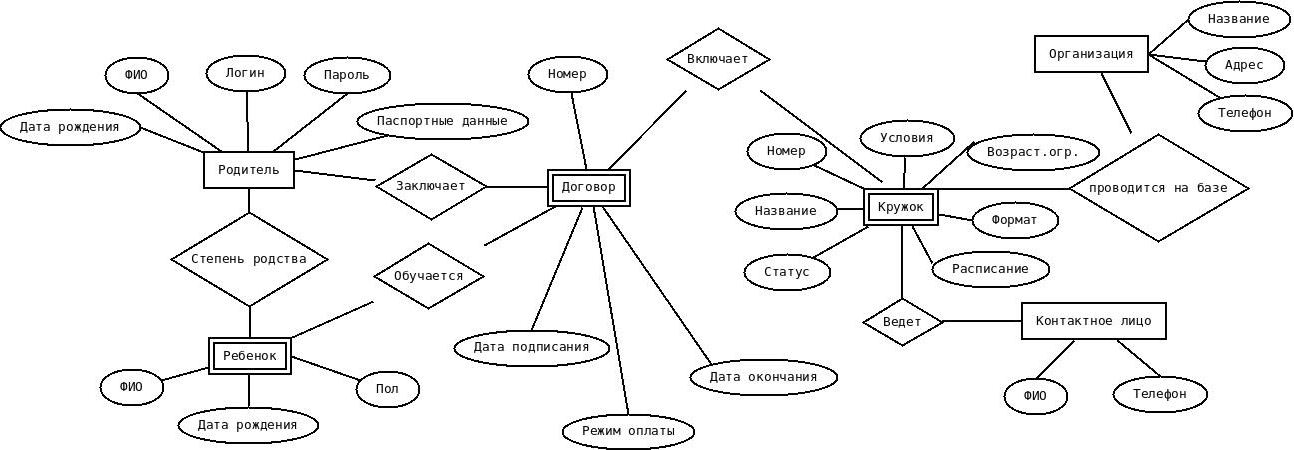

Рисунок 9. - Концептуальная модель предметной области

## Раздел 2. Нормализация, построение даталогической модели

На этапе построения концептуальной модели мы фактически не задумывались над типами связей между сущностями. При построении даталогической модели приходится детально отвечать на все такие вопросы. Кроме того, на этапе даталогического проектирования должен быть выбран вид базы данных. Несмотря на то, что существуют иерархические, сетевые (графовые) базы данных, а также различные варианты NoSQL-решений, мы выбираем наиболее распространенный вид - реляционную базу данных. 

В реляционной модели каждая сущность концептуальной модели превращается в реляционную таблицу. Кроме этого, некоторые атрибуты сущностей иногда удобнее реализовывать как справочные таблицы. Для построения корректной даталогической модели необходимо использовать теорию нормализации отношений, разработанную Э.Коддом. Согласно теории существует до 5 нормальных форм. На практике даталогическую модель доводят до третьей нормальной формы. С практической точки зрения, этого оказывается вполне достаточно для обеспечения надежного, непротиворечивого хранения информации в базе данных.

Последовательно рассмотрим этапы нормализации БД.

**Приведение к 1NF**

Требование 1NF - это атомарность всех атрибутов реляционных таблиц (одна ячейка – одно значение). 
В этой связи подробно рассмотрим атрибуты всех сущностей, определим их тип,  и при необходимости декомпозируем из на атомарные значения.

Для удобства в каждой реляционной таблице будем использовать только суррогатные простые первичные ключи, это позволит автоматически обеспечить 2 NF и соответственно полностью пропустить этот этап нормализации.

**Сущность "Родитель" - таблица "Parent"**

Определим в данной таблице простой первичный ключ **id**, тип значения INT.

Атрибут "Дата рождения" назовем **date_birth**, тип Date.

Атрибут "Логин" назовем **login**, тип строка - string.

Атрибут "Пароль" назовем **password**, тип строка - string.

Атрибут "ФИО" разобъем на два отдельных атрибута: фамилия - **surname**, тип строка - string, имя, отчество - **name**, тип строка - string.

Атрибут паспортные данные разобьем на два отдельных атрибута - **series**, **number**, типы INT.

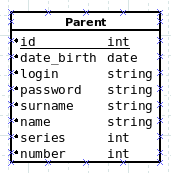

Рисунок 10. - Реляционная таблица сущности "Родитель"

**Сущность "Организация" - таблица "Organization"**

Определим в данной таблице простой первичный ключ **id**, тип значения INT.

Атрибут "Название" назовем **name**, тип строка - string.

Атрибут "Телефон" назовем **phone**, тип строка - string.

Атрибут "Адрес" декомпозирует на два: **street**, тип строка - string, **home**, тип строка - string. На практике для адреса удобно использовать иерархические справочники, но в нашем случае используем принятое упрощение.

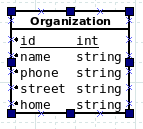

Рисунок 11. - Реляционная таблица сущности "Организация"

**Сущность "Контактное лицо" - таблица "Contact_person"**

Определим в данной таблице простой первичный ключ **id**, тип значения INT.

Атрибут "ФИО" разобъем на два отдельных атрибута: фамилия - **surname**, тип строка - string, имя, отчество - **name**, строка - string.

Атрибут "Телефон" назовем **phone**, тип строка - string.

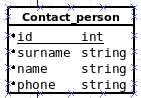

Рисунок 12. - Реляционная таблица сущности "Контактное лицо"

Мы рассмотрели реализации сильных сущностей в реляционной базе данных. Слабые сущности являются зависимыми от сильных сущностей, что, как правило, отражается в наличии в реляционных таблицах слабых сущностей внешних ключей. На данном этапе нормализации не будем учитывать эти связи. Таким образом, будет показана лишь часть атрибутов слабых сущностей - являющихся атомарными, или нуждающихся в приведении к атомарному состоянию. Внешние ключи мы обсудим на последующих этапах нормализации.

**Сущность "Ребенок" - таблица "Child"**

Определим в данной таблице простой первичный ключ **id**, тип значения INT.

Атрибут "ФИО" разобъем на два отдельных атрибута: фамилия - **surname**, тип строка - string, имя, отчество - **name**, тип строка - string.

Атрибут "Дата рождения" назовем **date_birth**, тип Date.

Атрибут "Пол" назовем **gender_id**, в дальнейшем данное поле должно стать внешним ключем к справочной таблице "Пол" (Gender), поэтому определим тип этого поля как INT.

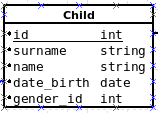

Рисунок 13. - Реляционная таблица сущности "Ребенок"

**Сущность "Кружок" - таблица "Section"**

Определим в данной таблице простой первичный ключ **id**, тип значения INT.

Атрибут "Номер" назовем **number**, тип INT (данное поле можно было бы использовать в качестве первичного ключа, поэтому он становится альтернативным).

Атрибут "Название" назовем **name**, тип строка - string.

Атрибут "Расписание" назовем **schedule**, тип строка - string (указывается день недели и временной отрезок проведения занятия).

Атрибут "Формат" назовем **format_id**, тип INT (в дальнейшем это будет внешний ключ на справочную таблицу **format**, содержащую записи: очный, заочный, дистанционный).

Атрибут "Статус" назовем **status_id**, тип INT (в дальнейшем это будет внешний ключ на справочную таблицу **status**, содержащую записи: идет прием, идет обучение, завершено).

Атрибут "Условия" поступления назовем **conditions_id**, тип INT (в дальнейшем это будет внешний ключ на справочную таблицу **conditions**, содержащую записи: без вступительных испытаний, собеседование, экзамены).

Атрибут "Возрастные ограничения" назовем **age_restrictions**, тип строка - string (указывается диапазон возрастных ограничений - от и до). 

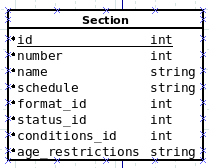

Рисунок 14. - Реляционная таблица сущности "Кружок"

**Сущность "Договор" - таблица "Agreement"**

Определим в данной таблице простой первичный ключ **id**, тип значения INT.

Атрибут "Номер" договора назовем **number**, данный атрибут можно было бы рассматривать как первичный ключ, но поскольку выбран суррогатный ключ **id**, данный атрибут можно рассматривать, как альтернативный ключ.

Атрибут "Дата подписания" договора назовем **date_signing**, тип значения Date.

Атрибут "Дата окончания" договора назовем **date_end**, тип значения Date.

Атрибут "Режим оплаты" предпалагает два режима - услуга предаставляется бесплатно, услуга предоставляется платно. В последнем случае целесообразно фиксировать сумму оплаты по договору, фактически оплаченную сумму. Фактическая оплата может проходить за определенные промежутки времени. Если требуется фиксировать промежутки оплаты, нужна отдельная сущность - "Этапы оплаты", включающая номер договора, дату, внесенную сумму. Однако мы пойдем по упрощенному пути - в таблице **Agreement** введем справочное поле **payment_mode** с двумя возможными значениями: платно, бесплатно, числовое поле **cost**, тип значения float - стоимость услуги, **fact_cost** - фактическая оплата услуги, тип значения float.

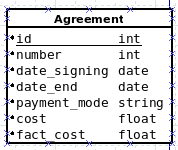

Рисунок 15. Реляционная таблица сущности "Договор"

Таким образом, этап приведения к 1NF завершен.

**Приведение к 2NF**

Приведение ко второй нормальной форме направлено на устранение частичных зависимостей, которые могут возникать между частями составного первичного ключа и остальными атрибутами. Поскольку на предыдущем этапе первичные ключи всех таблиц были выбраны простыми база данных уже приведена ко второй нормальной форме. 

**Приведение к 3NF, 4NF**

Таблица находится в третьей нормальной форме 3NF, если между ее атрибутами нет транзитивных связей (внутри приведенной к 3NF таблицы должны отсутствовать связи «один ко многим»). 

Таблица приведена к четвертой нормальной форме, если она соответствует 3NF и в ней отсутствуют многозначные зависимости (многие ко многим).

Пока мы никак не обсуждали реализацию связей между сущностями и наши реляционные таблицы не содержат внешних ключей. Перейдем к подробному описанию реализации связей между сущностями в концептуальной модели.

**Связь "Степень родства" между сущностями "Родитель", "Ребенок"**

Каждый родитель может быть родителем нескольких детей и, наоборот, у каждого ребенка может быть несколько родителей. Такое отношение демонстрирует классический вариант связи "Многие ко многим". В реляционной модели связь "многие ко многим" реализуют через третью таблицу. Назовем такую таблицу **Relation_degree**.

Таблица будет иметь следующие поля:

Первичный ключ таблицы **id**, тип значения INT.

Поле **kinsman_id** - внешний ключ на справочную таблицу **Кinsman**, содержащую наименование различных родственников, тип значения INT.

Поле **parent_id** - внешний ключ на таблицу **Parent**, указывающий родителя, тип значения INT.

Поле **child_id** - внешний ключ на таблицу **Child**, указывающий ребенка, тип значения INT.

Справочная таблица **Kinsman** будет иметь следующую структуру:

Первичный ключ таблицы **id**, тип значения INT.

Наименование родственника **name**, тип значения string (справочные значения: мать, отец).

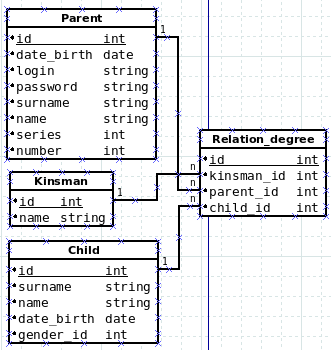

Рисунок 16. - Связи между сущностями "Родитель" - "Ребенок"

**Связь "Проводится на базе" между сущностями "Организация", "Кружок"**

На базе одной организации может проводиться несколько кружков. Таким образом, имеем классический вариант связи "Один ко многим". Ее реализация заключается в включении в таблицу **Section** внешнего ключа на таблицу **Organization**, назовем это поле **organization_id**, тип значения INT.

**Связь "Ведет" между сущностями "Контактное лицо", "Кружок"**

Аналогично, одно контактное лицо может проводить несколько кружков - связь "Один ко многим", т.е. добавляем в таблицу **Section** внешний ключ на таблицу **Contact_person**, назовем его **contact_person_id**, тип значения INT.

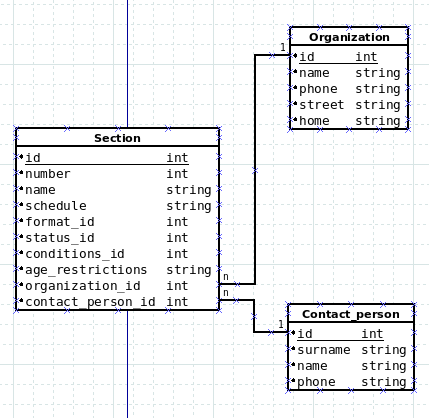

Рисунок 17. - Связи между сущностями "Организация", "Кружок" и "Контактное лицо", "Кружок"

**Связь "Включает" между сущностями "Кружок" и "Договор"**

Один кружок может быть указан в разных договорах, поэтому это классическая связь "Один ко многим". Для ее реализации добавляем в таблицу **Agreement** внешний ключ на таблицу **Section**, назовем его **section_id**, тип значения INT.

**Связи "Заключает" между сущностями "Родитель" и "Договор", "Обучается" между сущностями "Ребенок", "Договор"**

Один родитель может заключить несколько договоров на обучение его ребенка в разных кружках, таким образом, это связь "Один ко многим". 

Может показаться, что этой связи достаточно, ведь между родителем и ребенком уже существует связь, и если родитель заключает договор, то уже понятно, что он выступает от имени своих детей. Однако у родителя может быть несколько детей, и для какого конкретно из детей заключен договор, нужно указывать в договоре. При этом один и тот же ребенок может проходить обучение в разных кружках. Таким образом, это также связь "Один ко многим". 

Для реализации указанных связей можно добавить в таблицу **Agreement** внешний ключ на таблицу **Parent** - **parent_id**, тип значения INT, внешний ключ на таблицу **Child** - **child_id**, тип значения INT. Однако правильнее вместо этого в таблицу **Agreement** добавить внешний ключ на таблицу **Relation_degree** - - **relation_degree_id**, тип значения INT. Действительно, получив такую оптимизацию, мы сразу можем узнать, родитель какого ребенка заключил договор.

На данном этапе также можно выявить в таблице **Agreement** транзитивную зависимость: если в поле **payment_mode** выбрано значение бесплатно, то поля **cost**, **fact_cost** всегда будут заполнены нулями. Таким образом, информационное содержание **payment_mode** дублируется полем **cost** и может быть удалено. 

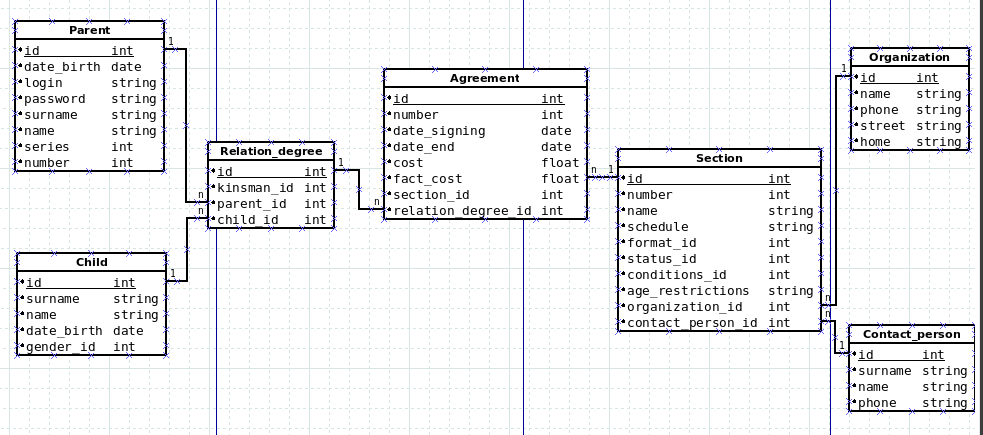

Рисунок 18. - Основные связи между сущностями

Для завершения этапа даталогического проектирования остается рассмотреть структуру и наполнение справочных таблиц: **Format**, **Status**, **Conditions**.

**Справочная таблица Format** включает в себя следующие поля:

Первичный ключ таблицы **id**, тип значения INT, поле **name**, тип значения string. Таблица содержит следующие записи: очный, заочный, дистанционный.

**Справочная таблица Status** включает в себя следующие поля:

Первичный ключ таблицы **id**, тип значения INT, поле **name**, тип значения string. Таблица содержит следующие записи: идет прием, идет обучение, завершено.

**Справочная таблица Conditions** включает в себя следующие поля:

Первичный ключ таблицы **id**, тип значения INT, поле **name**, тип значения string. Таблица содержит следующие записи: без вступительных испытаний, собеседование, экзамены.

**Справочная таблица Gender** включает в себя следующие поля:

Первичный ключ таблицы **id**, тип значения INT, поле **name**, тип значения string. Таблица содержит следующие записи: мужчина, женщина.

Окончательно даталогическая модель принимает следующий вид:

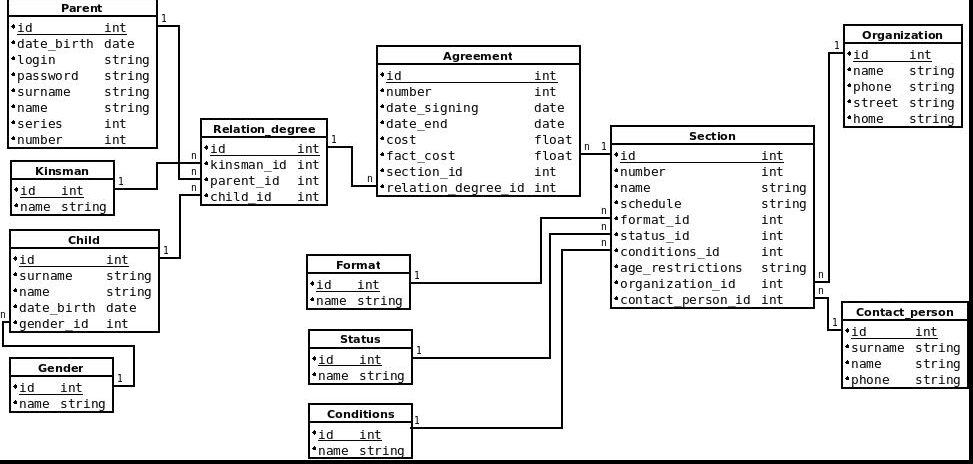

Рисунок 19. Даталогическая модель заданной предметной области

## Раздел 3. Построение физической модели

Построение физической модели включает в себя выбор конкретной системы управления базой данных (СУБД), в нашем случае это будет sqlite. 


Данный выбор продиктован возможностью ее использования в связке с python и средой colab, обеспечивающих удобную облачную платформу. 

Важно проанализировать, какие типы данных поддерживает выбранная СУБД. В sqlite Вы можете использовать любые типы данных: https://www.sqlite.org/datatypes.html. На самом деле sqlite не требует даже указывать типы данных, от является бестиповым, но эту особенность и возможность мы использовать не будет. Исключение из этого правила касаются первичных ключей, которые должны быть объявлены с типом INTEGER.

Первый этап построения физической модели включает в себя создание пустой базы данных на сервере СУБД. Мы используем для этих целей python и библиотеку sqlite3 

### Подключение к sqlite, создание базы данных artamonov.db

In [1]:
import sqlite3 # импортируем библиотеку по работе с базой данных
try:
    sqlite_connection = sqlite3.connect('artamonov.db') #создаем переменную подключения к БД
    cursor = sqlite_connection.cursor() #создаем специальную переменную по работе с БД
    print("База данных создана и успешно подключена к SQLite")

    sqlite_select_query = "SELECT sqlite_version();" #пишем запрос получение версии библиотеки sqlite 
    cursor.execute(sqlite_select_query) #выполняем запрос, после чего в буфере содержится текст результата
    record = cursor.fetchall() #читаем все содержимое буфера в переменную record
    print("Версия базы данных SQLite: ", record)
    cursor.close() #закрываем курсор по работе с БД

except sqlite3.Error as error:
    print("Ошибка при подключении к sqlite", error) # если при попытке подключения к БД возникли ошибки, выводим их
finally:
    if (sqlite_connection):
        sqlite_connection.close() #если соединение с БД открыто, закрываем его
        print("Соединение с SQLite закрыто")

База данных создана и успешно подключена к SQLite
Версия базы данных SQLite:  [('3.31.1',)]
Соединение с SQLite закрыто


После успешного создания базы данных, можно переходить к созданию в ней таблиц. Вначале целесообразно создать все справочные таблицы, поскольку они, как правило, не зависят от наличия - отсутствия других таблиц. 

В нашем случае таких таблиц 5: **Kinsman**, **Format**, **Status**, **Conditions**, **Gender**. Все они имеют одинаковую структуру.

### Создание, заполнение справочных таблиц

Для создания реляционных таблиц используется sql-запрос:

**CREATE TABLE Name_table (columns table);**

In [14]:
import sqlite3
try:
    sqlite_connection = sqlite3.connect('artamonov.db')
# Создаем sql-запросы на создание таблиц, записываем для удобства их в переменные с одноименным названием
    Kinsman = 'CREATE TABLE Kinsman (id INTEGER PRIMARY KEY NOT NULL, name VARCHAR(30) NOT NULL);'
    Format = 'CREATE TABLE Format (id INTEGER PRIMARY KEY NOT NULL, name VARCHAR(30) NOT NULL);'
    Status = 'CREATE TABLE Status (id INTEGER PRIMARY KEY NOT NULL, name VARCHAR(30) NOT NULL);'
    Conditions = 'CREATE TABLE Conditions (id INTEGER PRIMARY KEY NOT NULL, name VARCHAR(30) NOT NULL);'
    Gender = 'CREATE TABLE Gender (id INTEGER PRIMARY KEY NOT NULL, name VARCHAR(30) NOT NULL);'
    
    cursor = sqlite_connection.cursor()
    print("База данных подключена к SQLite")
    cursor.execute(Kinsman)
    sqlite_connection.commit()
    print("Таблица Kinsman создана")

    cursor.execute(Format)
    sqlite_connection.commit()
    print("Таблица Format создана")

    cursor.execute(Status)
    sqlite_connection.commit()
    print("Таблица Status создана")
    
    cursor.execute(Conditions)
    sqlite_connection.commit()
    print("Таблица Conditions создана")
    
    cursor.execute(Gender)
    sqlite_connection.commit()
    print("Таблица Gender создана")

    cursor.close()

except sqlite3.Error as error:
    print("Ошибка при подключении к sqlite", error)
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

База данных подключена к SQLite
Таблица Kinsman создана
Таблица Format создана
Таблица Status создана
Таблица Conditions создана
Таблица Gender создана
Соединение с SQLite закрыто


Заметим, что таблицы в базе данных должны иметь уникальные названия. Поэтому при попытке проиграть вышеприведенный код еще раз возникнет сообщение об ошибке.

Реализуем запросы на заполнение справочных таблиц.

In [15]:
# Заполнение таблицы Kinsman
import sqlite3
try:
    sqlite_connection = sqlite3.connect('artamonov.db')
    filling_Kinsman = '''INSERT INTO Kinsman (id, name) VALUES
                        (1, 'Мать'),
                        (2, 'Отец'),
                        (3, 'Сестра'),
                        (4, 'Бабушка'),
                        (5, 'Дедушка');
                      '''
    cursor = sqlite_connection.cursor()
    cursor.execute(filling_Kinsman)
    sqlite_connection.commit()
    cursor.close()
except sqlite3.Error as error:
    print("Ошибка при подключении к sqlite", error)
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

Соединение с SQLite закрыто


In [16]:
# Заполнение таблицы Format
import sqlite3
try:
    sqlite_connection = sqlite3.connect('artamonov.db')
    filling_Format = '''INSERT INTO Format (id, name) VALUES
                        (1, 'Очный'),
                        (2, 'Заочный'),
                        (3, 'Дистанционный');
                      '''
    cursor = sqlite_connection.cursor()
    cursor.execute(filling_Format)
    sqlite_connection.commit()
    cursor.close()
except sqlite3.Error as error:
    print("Ошибка при подключении к sqlite", error)
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

Соединение с SQLite закрыто


In [17]:
# Заполнение таблицы Status
import sqlite3
try:
    sqlite_connection = sqlite3.connect('artamonov.db')
    filling_Status = '''INSERT INTO Status (id, name) VALUES
                        (1, 'Идет прием'),
                        (2, 'Идет обучение'),
                        (3, 'Завершено');
                      '''
    cursor = sqlite_connection.cursor()
    cursor.execute(filling_Status)
    sqlite_connection.commit()
    cursor.close()
except sqlite3.Error as error:
    print("Ошибка при подключении к sqlite", error)
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

Соединение с SQLite закрыто


In [18]:
# Заполнение таблицы Conditions
import sqlite3
try:
    sqlite_connection = sqlite3.connect('artamonov.db')
    filling_Conditions = '''INSERT INTO Conditions (id, name) VALUES
                        (1, 'Без вступительных испытаний'),
                        (2, 'Собеседование'),
                        (3, 'Экзамен');
                      '''
    cursor = sqlite_connection.cursor()
    cursor.execute(filling_Conditions)
    sqlite_connection.commit()
    cursor.close()
except sqlite3.Error as error:
    print("Ошибка при подключении к sqlite", error)
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

Соединение с SQLite закрыто


In [19]:
# Заполнение таблицы Gender
import sqlite3
try:
    sqlite_connection = sqlite3.connect('artamonov.db')
    filling_gender = '''INSERT INTO Gender (id, name) VALUES
                        (1, 'мужчина'),
                        (2, 'женщина');
                      '''
    cursor = sqlite_connection.cursor()
    cursor.execute(filling_gender)
    sqlite_connection.commit()
    cursor.close()
except sqlite3.Error as error:
    print("Ошибка при подключении к sqlite", error)
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

Соединение с SQLite закрыто


Итак, справочные таблицы созданы и заполнены необходимой информацией. Для просмотра результата заполнения справочных таблиц усовершенствуем функцию, предложенную на практических занятиях.  Использование библиотек numpy, pandas позволяет красиво отображать выполненные запросы в виде таблиц.

In [20]:
#Функция реализует запрос на чтение к базе данных
def query_sql (db, query):
  sqlite_connection = sqlite3.connect(db)
  cursor = sqlite_connection.cursor()
  cursor.execute(query)
  sqlite_connection.commit()
  rows = cursor.fetchall()
  names = tuple(map(lambda x: x[0], cursor.description))
  cursor.close()
  sqlite_connection.close()
  import pandas as pd
  import numpy as np
  aa=np.array(rows)
  dd=pd.DataFrame(aa, columns=names)
  display(dd)

In [21]:
query_sql('artamonov.db','SELECT * FROM Kinsman;')
query_sql('artamonov.db','SELECT * FROM Format;')
query_sql('artamonov.db','SELECT * FROM Status;')
query_sql('artamonov.db','SELECT * FROM Conditions;')
query_sql('artamonov.db','SELECT * FROM Gender;')

,id,name
0,1,Мать
1,2,Отец
2,3,Сестра
3,4,Бабушка
4,5,Дедушка


,id,name
0,1,Очный
1,2,Заочный
2,3,Дистанционный


,id,name
0,1,Идет прием
1,2,Идет обучение
2,3,Завершено


,id,name
0,1,Без вступительных испытаний
1,2,Собеседование
2,3,Экзамен


,id,name
0,1,мужчина
1,2,женщина


В работе мы используем облачное окружение colab. Однако нужно иметь ввиду, что все файлы, созданные в этой среде хранятся только в течение сессии. После закрытия сессии, они удаляются. В частности удалится и сама созданная и заполненная база данных. Чтобы не приходилось каждый раз создавать вновь базу данных, таблицы, заполнять их информацией, необходимо сохранить созданную базу данных локально на свой компьютер, подгружая ее в случае необходимости в новой сессии. 

Имеется и другая альтернатива - установить на свой компьютер замечательное средство **jupyter lab**. В youtube очень много обучающих роликов по этому названию. Вот лишь один из них. 

In [23]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/bfCfBuIhlB8?si=uVBHF51H04IRXIyM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

https://practicum.yandex.ru/blog/chto-takoe-jupyter-notebook/#kak-zapustit

### Создание, заполнение целевых таблиц

После создания справочных таблиц целесообразно приступить к заполнению так называемых целевых таблиц (они содержат информацию, на хранение которой и нацелена база данных). Поскольку заполнение целевых таблиц происходит инкрементно (по частям, в разное время), здесь лучше использовать формы. В связке python+colab (или jupyter) Вы можете использовать наборы виджетов ipywidgets (https://ipywidgets.readthedocs.io/en/latest/index.html).

Начнем с создания формы для заполнения таблицы **Parent**, она не требует подключения справочных таблиц. Это упрощает задачу.
Таблица состоит из полей: id, date_birth, login, password, surname, name, series, number. Разработаем для этих полей соответствующую форму. 

Для полей id, series, number  будем использовать виджет IntText

Для полей login, surname, name будем использовать виждет Text

Для поля password будем использовать виждет Password

Для поля date_birth будем использовать виджет DatePicker

Материалы об этих виджетах представлены на странице документации: https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html

In [1]:
import ipywidgets as widgets #Подключаем библиотеку виджетов
from IPython.display import display # импортируем функцию для визуализации виджетов

style = {'description_width': 'initial'} #Делаем установку ширины поля discription под размер текста в нем
id = widgets.IntText(value=1, description='id:', disabled=False)
login = widgets.Text(value='login', description='login:', disabled=False)
password = widgets.Password(value='123', description='Password:', disabled=False)
surname = widgets.Text(value='Петров', description='Фамилия:', disabled=False)
name = widgets.Text(value='Петр Петрович', description='Имя, отчество:', disabled=False, style=style)
series = widgets.IntText(value=1, description='Серия паспорта:', disabled=False, style=style)
number = widgets.IntText(value=1, description='Номер паспорта:', disabled=False, style=style)
date_birth = widgets.DatePicker(description='Дата рождения:', disabled=False, style=style)
button = widgets.Button(description='Записать в  БД', disabled=False, button_style='')
display(id, login, password, surname, name, series, number, date_birth, button)

IntText(value=1, description='id:')

Text(value='login', description='login:')

Password(description='Password:')

Text(value='Петров', description='Фамилия:')

Text(value='Петр Петрович', description='Имя, отчество:', style=DescriptionStyle(description_width='initial'))

IntText(value=1, description='Серия паспорта:', style=DescriptionStyle(description_width='initial'))

IntText(value=1, description='Номер паспорта:', style=DescriptionStyle(description_width='initial'))

DatePicker(value=None, description='Дата рождения:', style=DescriptionStyle(description_width='initial'))

Button(description='Записать в  БД', style=ButtonStyle())

В результате выполнения данного кода мы получаем следующую форму:

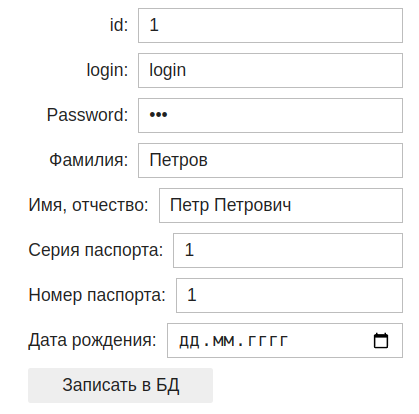

Теперь осталось написать обработчик события при нажатии на кнопку, в котором будет формироваться соответствующий SQL запрос INSERT на добавление информации в базу данных. Однако вначале нужно написать запрос на создание таблицы Parent. Для этого модицируем нашу функцию query_sql, чтобы с помощью ее корректно можно было выполнять не только запросы типа SELECT, но и другие запросы, которые не выводят никаких сообщений. Для этого предусмотрим логический параметр visible - если его значение стоит в false, то запрос ничего не выводит, иначе, возвращается датафрейм результата, который можно визуализировать.

In [2]:
def query_sql (db, query, visible = True):
  import sqlite3
  sqlite_connection = sqlite3.connect(db)
  cursor = sqlite_connection.cursor()
  cursor.execute(query)
  sqlite_connection.commit()
  if visible:
    rows = cursor.fetchall()
    names = tuple(map(lambda x: x[0], cursor.description))
    import pandas as pd
    import numpy as np
    aa=np.array(rows)
    dd=pd.DataFrame(aa, columns=names)
    return dd
  cursor.close()
  sqlite_connection.close()

Тогда запрос на создание таблицы Parent будет таким:

In [24]:
query_sql('artamonov.db','''
    CREATE TABLE Parent (id INTEGER PRIMARY KEY NOT NULL, 
                         date_birth VARCHAR(10) NOT NULL,
                         login VARCHAR(15) NOT NULL,
                         password VARCHAR(15) NOT NULL, 
                         surname VARCHAR(20) NOT NULL,
                         name VARCHAR(40) NOT NULL,
                         series INTEGER NOT NULL,
                         number INTEGER NOT NULL);
          ''', False)

С помощью специального запроса посмотрим перечень всех созданных таблиц:

In [25]:
#Посмотреть список всех таблиц в базе данных
query_sql('artamonov.db','SELECT name FROM sqlite_master WHERE type=\'table\';')

,name
0,Kinsman
1,Format
2,Status
3,Conditions
4,Gender
5,Parent


Для удобства создадим специальную кнопку для просмотра списка созданных таблиц:

In [3]:
from IPython.display import clear_output
style = {'description_width': 'initial'}
list_tables_button = widgets.Button(description="Cписок таблиц", style = style)

output = widgets.Output()
print('Заполнение списка таблиц БД')
display(list_tables_button,output)

def on_list_button_clicked(b):
    with output:
        clear_output()
        display(query_sql('artamonov.db','SELECT name FROM sqlite_master WHERE type=\'table\';'))
    
list_tables_button.on_click(on_list_button_clicked)

Заполнение списка таблиц БД


Button(description='Cписок таблиц', style=ButtonStyle())

Output()

Теперь по аналогии для заполнения таблицы Parent напишем соответствующий обработчик события нажатия на кнопку - должен запускаться запрос на добавление информации из полей в таблицу Parent.

In [4]:
import ipywidgets as widgets #Подключаем библиотеку виджетов
from IPython.display import display # импортируем функцию для визуализации виджетов

style = {'description_width': 'initial'} #Делаем установку ширины поля discription под размер текста в нем
id = widgets.IntText(value=1, description='id:', disabled=False)
login = widgets.Text(value='login', description='login:', disabled=False)
password = widgets.Password(value='123', description='Password:', disabled=False)
surname = widgets.Text(value='Петров', description='Фамилия:', disabled=False)
name = widgets.Text(value='Петр Петрович', description='Имя, отчество:', disabled=False, style=style)
series = widgets.IntText(value=1, description='Серия паспорта:', disabled=False, style=style)
number = widgets.IntText(value=1, description='Номер паспорта:', disabled=False, style=style)
date_birth = widgets.DatePicker(description='Дата рождения:', disabled=False, style=style)
button = widgets.Button(description='Записать в  БД', disabled=False, button_style='')
print('Заполнение таблицы Parent')
display(id, login, password, surname, name, series, number, date_birth, button)

def button_clicked(b):
    query = 'INSERT INTO Parent (id, login, password, surname, name, series, number, date_birth) VALUES '
    query += '(' + str(id.value) + ',' + '\''+ login.value + '\''+ ',' + '\'' + password.value + '\'' + ',' + '\''+ surname.value + '\''+ ',' + '\'' + name.value + '\''+ ',' + str(series.value) + ',' + str(number.value) + ',' + '\'' + str(date_birth.value) + '\'' + ');'
    query_sql('artamonov.db', query, False)
    
button.on_click(button_clicked)

Заполнение таблицы Parent


IntText(value=1, description='id:')

Text(value='login', description='login:')

Password(description='Password:')

Text(value='Петров', description='Фамилия:')

Text(value='Петр Петрович', description='Имя, отчество:', style=DescriptionStyle(description_width='initial'))

IntText(value=1, description='Серия паспорта:', style=DescriptionStyle(description_width='initial'))

IntText(value=1, description='Номер паспорта:', style=DescriptionStyle(description_width='initial'))

DatePicker(value=None, description='Дата рождения:', style=DescriptionStyle(description_width='initial'))

Button(description='Записать в  БД', style=ButtonStyle())

Для удобства создадим форму для просмотра содержимого заданной таблицы.

In [5]:
import ipywidgets as widgets #Подключаем библиотеку виджетов
from IPython.display import display # импортируем функцию для визуализации виджетов

table_name = widgets.Text(value='Gender', description='Таблица:', disabled=False)
button = widgets.Button(description='View', disabled=False, button_style='')
output = widgets.Output()
print('Просмотр содержимого таблиц')
display(table_name, button, output)

def button_clicked(b):
    with output:
        clear_output()
        display(query_sql('artamonov.db','select * from ' + table_name.value + ';'))
    
button.on_click(button_clicked)


Просмотр содержимого таблиц


Text(value='Gender', description='Таблица:')

Button(description='View', style=ButtonStyle())

Output()

Заполним таблицу Parent записями:

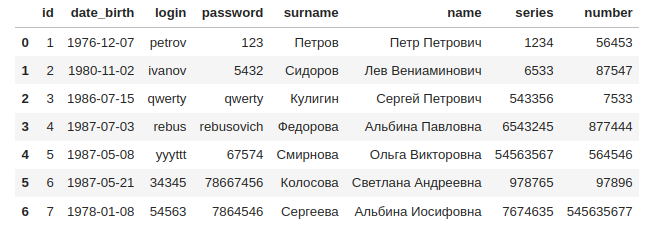

По аналогии создадим формы для заполнения таблиц Organization, Contact_person, но вначале создадим эти таблицы:

In [30]:
query_sql('artamonov.db','''CREATE TABLE Contact_person 
                            (id INTEGER PRIMARY KEY NOT NULL,
                             surname VARCHAR(20) NOT NULL, 
                             name VARCHAR(40) NOT NULL, 
                             phone VARCHAR(11) NOT NULL);
                         ''', False)

query_sql('artamonov.db','''CREATE TABLE Organization 
                            (id INTEGER PRIMARY KEY NOT NULL,
                             name VARCHAR(20) NOT NULL,  
                             phone VARCHAR(11) NOT NULL,
                             street VARCHAR(40) NOT NULL,
                             home VARCHAR(40) NOT NULL);
                         ''', False)

In [6]:
import ipywidgets as widgets #Подключаем библиотеку виджетов
from IPython.display import display # импортируем функцию для визуализации виджетов

style = {'description_width': 'initial'} #Делаем установку ширины поля discription под размер текста в нем
id = widgets.IntText(value=1, description='id:', disabled=False)
surname = widgets.Text(value='Петров', description='Фамилия:', disabled=False)
name = widgets.Text(value='Петр Петрович', description='Имя, отчество:', disabled=False, style=style)
phone = widgets.Text(value='', description='Телефон', disabled=False, style=style)
button = widgets.Button(description='Записать в  БД', disabled=False, button_style='')
print('Заполнение таблицы Contact_person')
display(id, surname, name, phone, button)

def button_clicked(b):
    query = 'INSERT INTO Contact_person (id, surname, name, phone) VALUES '
    query += '(' + str(id.value) + ',' + '\''+ surname.value + '\''+ ',' + '\'' + name.value + '\''+ ',' + '\'' + phone.value +'\'' + ');'
    query_sql('artamonov.db', query, False)
    
button.on_click(button_clicked)

Заполнение таблицы Contact_person


IntText(value=1, description='id:')

Text(value='Петров', description='Фамилия:')

Text(value='Петр Петрович', description='Имя, отчество:', style=DescriptionStyle(description_width='initial'))

Text(value='', description='Телефон', style=DescriptionStyle(description_width='initial'))

Button(description='Записать в  БД', style=ButtonStyle())

В результате выполнения данного кода мы получаем следующую форму:
    
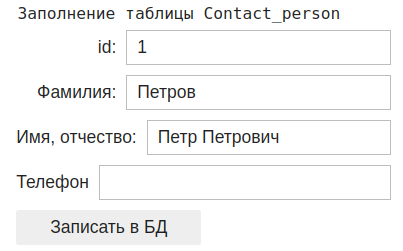

После заполнения получим следующую таблицу:

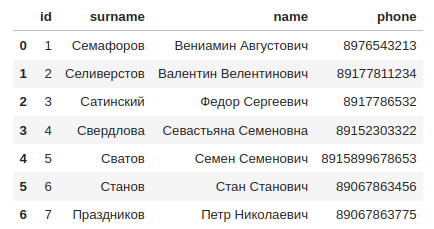

In [7]:
import ipywidgets as widgets #Подключаем библиотеку виджетов
from IPython.display import display # импортируем функцию для визуализации виджетов

style = {'description_width': 'initial'} #Делаем установку ширины поля discription под размер текста в нем
id = widgets.IntText(value=1, description='id:', disabled=False)
name = widgets.Text(value='', description='Название организации:', disabled=False, style=style)
phone = widgets.Text(value='', description='Телефон', disabled=False, style=style)
street = widgets.Text(value='', description='Улица:', disabled=False, style=style)
home = widgets.Text(value='', description='Дом:', disabled=False, style=style)

button = widgets.Button(description='Записать в  БД', disabled=False, button_style='')
print('Заполнение таблицы Organization')
display(id, name, phone, street, home, button)

def button_clicked(b):
    query = 'INSERT INTO Organization (id, name, phone, street, home) VALUES '
    query += '(' + str(id.value) + ',' + '\''+ name.value + '\''+ ',' + '\'' + phone.value + '\''+ ',' + '\'' + street.value +'\'' + ',' + '\'' + home.value +'\');'
    query_sql('artamonov.db', query, False)
    
button.on_click(button_clicked)

Заполнение таблицы Organization


IntText(value=1, description='id:')

Text(value='', description='Название организации:', style=DescriptionStyle(description_width='initial'))

Text(value='', description='Телефон', style=DescriptionStyle(description_width='initial'))

Text(value='', description='Улица:', style=DescriptionStyle(description_width='initial'))

Text(value='', description='Дом:', style=DescriptionStyle(description_width='initial'))

Button(description='Записать в  БД', style=ButtonStyle())

Результирующая форма:

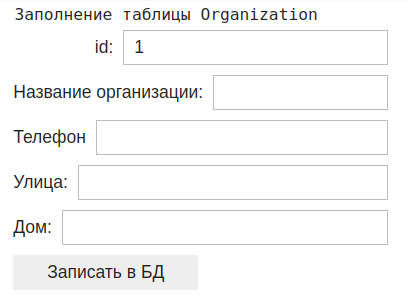

После заполнения получим следующую таблицу:

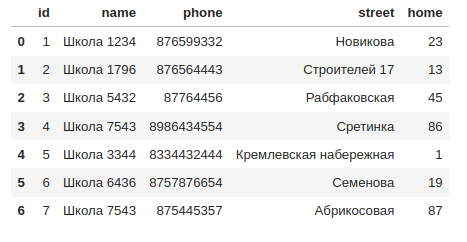

При заполнении остальных таблиц требуется делать подстановки значений из справочных таблиц. Покажем  реализацию на примере таблицы Child. Для подстановки используем виджет widgets.Dropdown, но вначале создадим данную таблицу.

In [35]:
query_sql('artamonov.db','''CREATE TABLE Child 
                            (id INTEGER PRIMARY KEY NOT NULL,
                             surname VARCHAR(20) NOT NULL, 
                             name VARCHAR(40) NOT NULL, 
                             date_birth VARCHAR(11) NOT NULL,
                             gender_id INTEGER NOT NULL REFERENCES `Gender` (`id`)
                             ON DELETE NO ACTION ON UPDATE NO ACTION);
                         ''', False)

In [8]:
import ipywidgets as widgets #Подключаем библиотеку виджетов
from IPython.display import display # импортируем функцию для визуализации виджетов

style = {'description_width': 'initial'} #Делаем установку ширины поля discription под размер текста в нем
id = widgets.IntText(value=1, description='id:', disabled=False)
surname = widgets.Text(value='', description='Фамилия:', disabled=False, style=style)
name = widgets.Text(value='', description='Имя, отчество:', disabled=False, style=style)
date_birth = widgets.DatePicker(description='Дата рождения:', disabled=False, style=style)
R=query_sql('artamonov.db','select * from Gender;')
gender_id=widgets.Dropdown(
    options=[tuple([R.iloc[i][1], int(R.iloc[i][0])]) for i in range(len(R['id']))],
    value = 1,
    description='Пол:',
    disabled=False
)

button = widgets.Button(description='Записать в  БД', disabled=False, button_style='')
print('Заполнение таблицы Child')
display(id, surname, name,date_birth, gender_id, button)

def button_clicked(b):
    query = 'INSERT INTO Child (id, surname, name, date_birth, gender_id) VALUES '
    query += '(' + str(id.value) + ',' + '\''+ surname.value + '\''+ ',' + '\'' + name.value + '\''+ ',' + '\'' + str(date_birth.value) +'\'' + ',' + str(gender_id.value) +');'
    query_sql('artamonov.db', query, False)
    
button.on_click(button_clicked)

Заполнение таблицы Child


IntText(value=1, description='id:')

Text(value='', description='Фамилия:', style=DescriptionStyle(description_width='initial'))

Text(value='', description='Имя, отчество:', style=DescriptionStyle(description_width='initial'))

DatePicker(value=None, description='Дата рождения:', style=DescriptionStyle(description_width='initial'))

Dropdown(description='Пол:', options=(('мужчина', 1), ('женщина', 2)), value=1)

Button(description='Записать в  БД', style=ButtonStyle())

Результирующая форма:

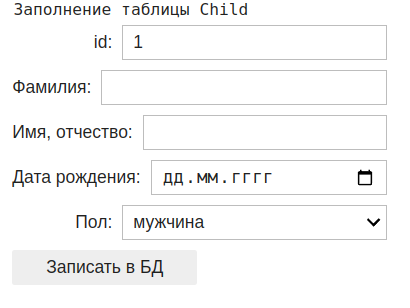

После заполнения получим следующую таблицу:

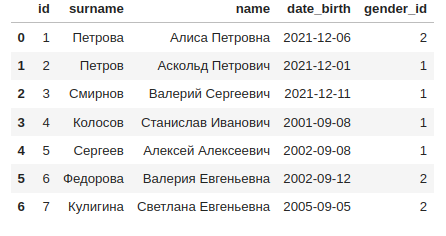

Рассмотрим создание, заполнение остальных таблиц.

Создание таблицы Section

In [38]:
query_sql('artamonov.db','''CREATE TABLE Section 
                            (id INTEGER PRIMARY KEY NOT NULL,
                             number INTEGER NOT NULL, 
                             name VARCHAR(100) NOT NULL,
                             schedule VARCHAR(40) NOT NULL, 
                             age_restrictions VARCHAR(30) NOT NULL,
                             format_id INTEGER NOT NULL REFERENCES `Format` (`id`)
                             ON DELETE NO ACTION ON UPDATE NO ACTION,
                             status_id INTEGER NOT NULL REFERENCES `Status` (`id`)
                             ON DELETE NO ACTION ON UPDATE NO ACTION,
                             conditions_id INTEGER NOT NULL REFERENCES `Conditions` (`id`)
                             ON DELETE NO ACTION ON UPDATE NO ACTION,
                             organization_id INTEGER NOT NULL REFERENCES `Organization` (`id`)
                             ON DELETE NO ACTION ON UPDATE NO ACTION,
                             contact_person_id INTEGER NOT NULL REFERENCES `Contact_person` (`id`)
                             ON DELETE NO ACTION ON UPDATE NO ACTION);
                         ''', False)

Создание таблицы Relation_degree

In [39]:
query_sql('artamonov.db','''CREATE TABLE Relation_degree
                            (id INTEGER PRIMARY KEY NOT NULL,
                             kinsman_id INTEGER NOT NULL REFERENCES `Kinsman` (`id`) 
                             ON DELETE NO ACTION ON UPDATE NO ACTION,
                             parent_id INTEGER NOT NULL REFERENCES `Parent` (`id`) 
                             ON DELETE NO ACTION ON UPDATE NO ACTION,
                             child_id INTEGER NOT NULL REFERENCES `Child` (`id`) 
                             ON DELETE NO ACTION ON UPDATE NO ACTION);
                        ''', False)

Создание таблицы Agreement

In [40]:
query_sql('artamonov.db','''CREATE TABLE Agreement
                            (id INTEGER PRIMARY KEY NOT NULL,
                             number INTEGER NOT NULL,
                             date_signing VARCHAR(20) NOT NULL,
                             date_end VARCHAR(20) NOT NULL,
                             cost FLOAT NOT NULL, 
                             fact_cost FLOAT NOT NULL,
                             section_id INTEGER NOT NULL REFERENCES `Section` (`id`) 
                             ON DELETE NO ACTION ON UPDATE NO ACTION,
                             relation_degree_id INTEGER NOT NULL REFERENCES `Relation_degree` (`id`) 
                             ON DELETE NO ACTION ON UPDATE NO ACTION);
                        ''', False)

Заполнение таблицы Section

In [9]:
import ipywidgets as widgets #Подключаем библиотеку виджетов
from IPython.display import display # импортируем функцию для визуализации виджетов

style = {'description_width': 'initial'} #Делаем установку ширины поля discription под размер текста в нем
id = widgets.IntText(value=1, description='id:', disabled=False)
number = widgets.IntText(value=1, description='Номер:', disabled=False)
name = widgets.Text(value='', description='Название:', disabled=False, style=style)
schedule = widgets.Text(value='', description='Расписание:', disabled=False, style=style)
age_restrictions = widgets.Text(value='', description='Возрастные ограничения:', disabled=False, style=style)
R=query_sql('artamonov.db','select * from Format;')
format_id=widgets.Dropdown(
    options=[tuple([R.iloc[i][1], int(R.iloc[i][0])]) for i in range(len(R['id']))],
    value = 1,
    description='Формат:',
    disabled=False
)
R=query_sql('artamonov.db','select * from Status;')
status_id=widgets.Dropdown(
    options=[tuple([R.iloc[i][1], int(R.iloc[i][0])]) for i in range(len(R['id']))],
    value = 1,
    description='Статус:',
    disabled=False
)
R=query_sql('artamonov.db','select * from Conditions;')
conditions_id=widgets.Dropdown(
    options=[tuple([R.iloc[i][1], int(R.iloc[i][0])]) for i in range(len(R['id']))],
    value = 1,
    description='Условия:',
    disabled=False
)

R=query_sql('artamonov.db','select * from Organization;')
organization_id=widgets.Dropdown(
    options=[tuple([R.iloc[i][1], int(R.iloc[i][0])]) for i in range(len(R['id']))],
    value = 1,
    description='Организация:',
    style=style,
    disabled=False
)

R=query_sql('artamonov.db','select * from Contact_person;')
contact_person_id=widgets.Dropdown(
    options=[tuple([R.iloc[i][1] + ' ' + R.iloc[i][2], int(R.iloc[i][0])]) for i in range(len(R['id']))],
    value = 1,
    description='Контактное лицо:',
    style=style,
    disabled=False
)

button = widgets.Button(description='Записать в  БД', disabled=False, button_style='')
print('Заполнение таблицы Section')
display(id, number, name, schedule, age_restrictions, format_id, status_id, conditions_id, organization_id, contact_person_id, button)

def button_clicked(b):
    query = '''INSERT INTO Section (id, number, name, schedule, age_restrictions, 
                                    format_id, status_id, conditions_id, organization_id, contact_person_id) VALUES '''
    query += '(' + str(id.value) + ',' + str(number.value) + ',' + '\'' + name.value +'\'' + ',' + '\'' + schedule.value +'\'' + ','
    query += '\'' + age_restrictions.value +'\'' + ',' +  str(format_id.value) + ','
    query += str(status_id.value) + ',' + str(conditions_id.value) + ','
    query += str(organization_id.value) + ',' + str(contact_person_id.value) + ');'
    query_sql('artamonov.db', query, False)
    
button.on_click(button_clicked)

Заполнение таблицы Section


IntText(value=1, description='id:')

IntText(value=1, description='Номер:')

Text(value='', description='Название:', style=DescriptionStyle(description_width='initial'))

Text(value='', description='Расписание:', style=DescriptionStyle(description_width='initial'))

Text(value='', description='Возрастные ограничения:', style=DescriptionStyle(description_width='initial'))

Dropdown(description='Формат:', options=(('Очный', 1), ('Заочный', 2), ('Дистанционный', 3)), value=1)

Dropdown(description='Статус:', options=(('Идет прием', 1), ('Идет обучение', 2), ('Завершено', 3)), value=1)

Dropdown(description='Условия:', options=(('Без вступительных испытаний', 1), ('Собеседование', 2), ('Экзамен'…

Dropdown(description='Организация:', options=(('Школа 1234', 1), ('Школа 1796', 2), ('Школа 5432', 3), ('Школа…

Dropdown(description='Контактное лицо:', options=(('Семафоров Вениамин Августович', 1), ('Селиверстов Валентин…

Button(description='Записать в  БД', style=ButtonStyle())

Результирующая форма:

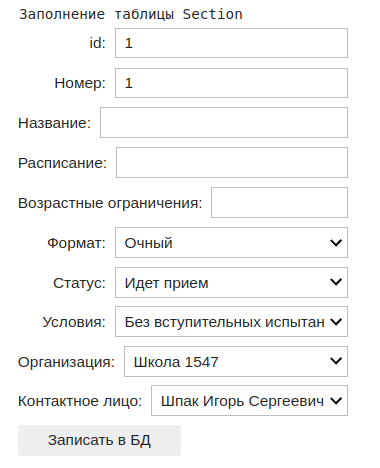

После заполнения получим следующий результат:

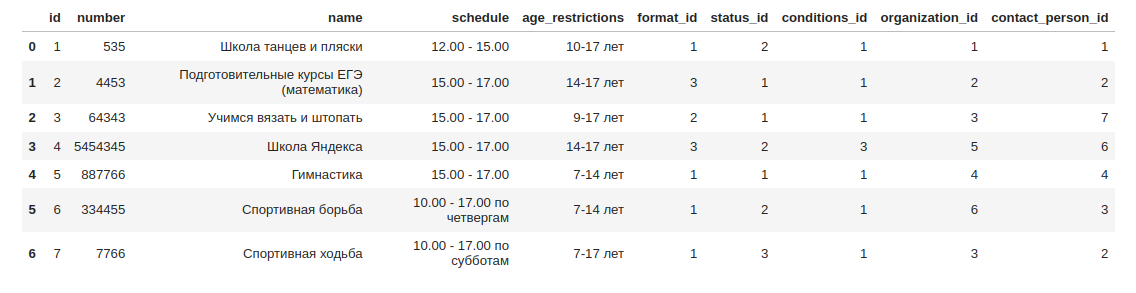

Заполнение таблицы Relation_degree

In [10]:
import ipywidgets as widgets #Подключаем библиотеку виджетов
from IPython.display import display # импортируем функцию для визуализации виджетов

style = {'description_width': 'initial'} #Делаем установку ширины поля discription под размер текста в нем
id = widgets.IntText(value=1, description='id:', disabled=False)
R=query_sql('artamonov.db','select * from Kinsman;')
kinsman_id=widgets.Dropdown(
    options=[tuple([R.iloc[i][1], int(R.iloc[i][0])]) for i in range(len(R['id']))],
    value = 1,
    description='Степень родства:',
    disabled=False,
    style=style
)

R=query_sql('artamonov.db','select * from Parent;')
parent_id=widgets.Dropdown(
    options=[tuple([R.iloc[i][4] + ' ' + R.iloc[i][5], int(R.iloc[i][0])]) for i in range(len(R['id']))],
    value = 1,
    description='Родитель:',
    style=style,
    disabled=False
)

R=query_sql('artamonov.db','select * from Child;')
child_id=widgets.Dropdown(
    options=[tuple([R.iloc[i][1] + ' ' + R.iloc[i][2], int(R.iloc[i][0])]) for i in range(len(R['id']))],
    value = 1,
    description='Ребенок:',
    style=style,
    disabled=False
)

button = widgets.Button(description='Записать в  БД', disabled=False, button_style='')
print('Заполнение таблицы Relation_degree')
display(id, kinsman_id, parent_id, child_id, button)

def button_clicked(b):
    query = '''INSERT INTO Relation_degree (id, kinsman_id, parent_id, child_id) VALUES '''
    query += '(' + str(id.value) + ',' + str(kinsman_id.value) + ',' 
    query += str(parent_id.value) + ',' + str(child_id.value) + ');'
    query_sql('artamonov.db', query, False)
    
button.on_click(button_clicked)

Заполнение таблицы Relation_degree


IntText(value=1, description='id:')

Dropdown(description='Степень родства:', options=(('Мать', 1), ('Отец', 2), ('Сестра', 3), ('Бабушка', 4), ('Д…

Dropdown(description='Родитель:', options=(('Петров Петр Петрович', 1), ('Сидоров Лев Вениаминович', 2), ('Кул…

Dropdown(description='Ребенок:', options=(('Петрова Алиса Петровна', 1), ('Петров Аскольд Петрович', 2), ('Сми…

Button(description='Записать в  БД', style=ButtonStyle())

Результирующая форма:

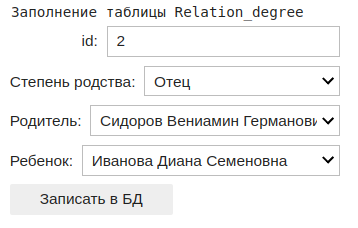

После заполнения получим следующий результат:

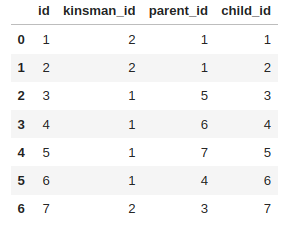

Заполнение таблицы Agreement

In [11]:
import ipywidgets as widgets #Подключаем библиотеку виджетов
from IPython.display import display # импортируем функцию для визуализации виджетов

style = {'description_width': 'initial'} #Делаем установку ширины поля discription под размер текста в нем
id = widgets.IntText(value=1, description='id:', disabled=False)
number = widgets.IntText(value=1, description='Номер:', disabled=False)
date_signing = widgets.DatePicker(description='Дата заключения договора:', disabled=False, style=style)
date_end = widgets.DatePicker(description='Дата окончания договора:', disabled=False, style=style)
cost = widgets.FloatText(value=0.0, description='Стоимость:', disabled=False, style=style)
fact_cost = widgets.FloatText(value=0.0, description='Оплачено:', disabled=False, style=style)
parent = widgets.Text(value='', description='Родитель:', disabled=True)
child = widgets.Text(value='', description='Ребенок:', disabled=True)
R=query_sql('artamonov.db','select * from Section;')
section_id=widgets.Dropdown(
    options=[tuple([R.iloc[i][2], int(R.iloc[i][0])]) for i in range(len(R['id']))],
    value = 1,
    description='Кружок:',
    disabled=False
)


R=query_sql('artamonov.db','select * from Relation_degree;')
relation_degree_id=widgets.Dropdown(
    options=[R.iloc[i][0] for i in range(len(R['id']))],
    value = 1,
    description='Родство:',
    style=style,
    disabled=False
)

R=query_sql('artamonov.db','select parent_id, child_id from Relation_degree where id = ' + str(relation_degree_id.value) +';')
Q = query_sql('artamonov.db', 'select surname, name from Parent where id = ' + str(R['parent_id'][0]) + ';')
parent.value = Q['surname'][0] + ' ' + Q['name'][0]
Q = query_sql('artamonov.db', 'select surname, name from Child where id = ' + str(R['child_id'][0]) + ';')
child.value = Q['surname'][0] + ' ' + Q['name'][0]


def on_change(change):
    R=query_sql('artamonov.db','select parent_id, child_id from Relation_degree where id = ' + str(relation_degree_id.value) +';')
    Q = query_sql('artamonov.db', 'select surname, name from Parent where id = ' + str(R['parent_id'][0]) + ';')
    parent.value = Q['surname'][0] + ' ' + Q['name'][0]
    Q = query_sql('artamonov.db', 'select surname, name from Child where id = ' + str(R['child_id'][0]) + ';')
    child.value = Q['surname'][0] + ' ' + Q['name'][0]


relation_degree_id.observe(on_change)

button = widgets.Button(description='Записать в  БД', disabled=False, button_style='')
print('Заполнение таблицы Agreement')
display(id, number, date_signing, date_end, cost, fact_cost, section_id, relation_degree_id, parent, child, button)

def button_clicked(b):
    query = '''INSERT INTO Agreement (id, number, date_signing, date_end, cost, fact_cost, section_id, relation_degree_id) VALUES '''
    query += '(' + str(id.value) + ',' + str(number.value) + ',' + '\'' + str(date_signing.value) +'\'' + ',' + '\'' + str(date_end.value) +'\'' + ','
    query += str(cost.value) + ',' + str(fact_cost.value) + ','
    query += str(section_id.value) + ','
    query += str(relation_degree_id.value) + ');'
    query_sql('artamonov.db', query, False)
    
button.on_click(button_clicked)

Заполнение таблицы Agreement


IntText(value=1, description='id:')

IntText(value=1, description='Номер:')

DatePicker(value=None, description='Дата заключения договора:', style=DescriptionStyle(description_width='init…

DatePicker(value=None, description='Дата окончания договора:', style=DescriptionStyle(description_width='initi…

FloatText(value=0.0, description='Стоимость:', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.0, description='Оплачено:', style=DescriptionStyle(description_width='initial'))

Dropdown(description='Кружок:', options=(('Школа танцев и пляски', 1), ('Подготовительные курсы ЕГЭ (математик…

Dropdown(description='Родство:', options=(1, 2, 3, 4, 5, 6, 7), style=DescriptionStyle(description_width='init…

Text(value='Петров Петр Петрович', description='Родитель:', disabled=True)

Text(value='Петрова Алиса Петровна', description='Ребенок:', disabled=True)

Button(description='Записать в  БД', style=ButtonStyle())

Результирующая форма:

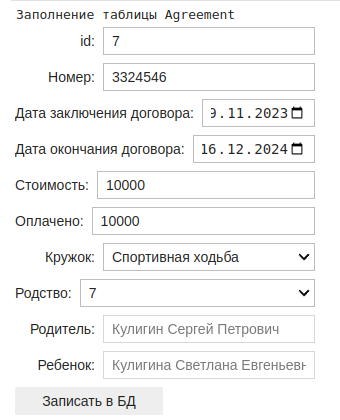

После заполнения данной таблицы получим следующий результат:

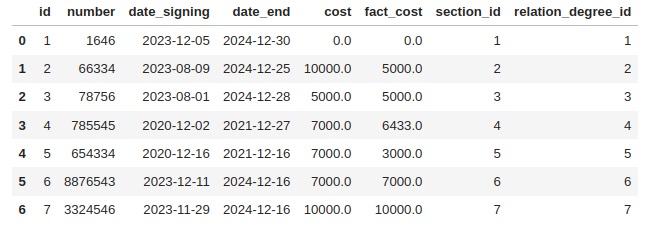

## Построение типовых запросов на выборку данных

Итак, база данных построена. Остается реализавать ряд типовых запросов.

Для более содержательных запросов при необходимости можно добавить в целевые таблицы дополнительные записи.

**Запрос типа Like**

Рассчитать суммарное количество детей, которые посещают спортивные кружки. Данный запрос выполним в два этапа:
1. Получим список детей, которые посещают спортивные кружки.
2. Рассчитаем количество по этому списку.

Добавим в таблицу Agreement еще несколько записей. В итоге получим следующую таблицу:

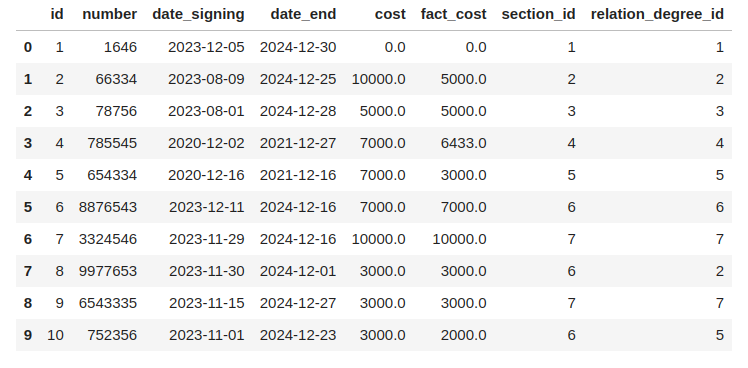

Факт того, что ребенок посещает кружок отражается в таблице Agreement, а то, что этот кружок относится к категории спортивных в таблице Section. ФИО ребенка можно получить из таблицы Child. Для этого все эти таблицы нужно соответствующим образом связать.

In [12]:
query_sql('artamonov.db', '''SELECT Agreement.id, Child.surname, Child.name, Section.name 
                             FROM Agreement, Child, Section, Relation_degree
                             WHERE Relation_degree.id = Agreement.relation_degree_id AND
                             Section.id = Agreement.section_id AND Child.id = Relation_degree.child_id
                             AND Section.name LIKE "%Спорт%";
                          '''
         )

,id,surname,name,name
0,6,Федорова,Валерия Евгеньевна,Спортивная борьба
1,7,Кулигина,Светлана Евгеньевна,Спортивная ходьба
2,8,Петров,Аскольд Петрович,Спортивная борьба
3,9,Кулигина,Светлана Евгеньевна,Спортивная ходьба
4,10,Сергеев,Алексей Алексеевич,Спортивная борьба


Используем данный запрос, как подзапрос в получении окончательного результата:

In [13]:
query_sql('artamonov.db', '''SELECT count(a.id) as 'Количество детей, которые посещают спортивные кружки' FROM
                             (SELECT Agreement.id, Child.surname, Child.name, Section.name 
                             FROM Agreement, Child, Section, Relation_degree
                             WHERE Relation_degree.id = Agreement.relation_degree_id AND
                             Section.id = Agreement.section_id AND Child.id = Relation_degree.child_id
                             AND Section.name LIKE "%Спорт%") a;
                          '''
         )

,"Количество детей, которые посещают спортивные кружки"
0,5


**Запрос типа BETWEEN**

Запрос BETWEEN используется для выборки данных из диапазона с указанием начала и конца этого диапазона.

Получим список родителей, которые заплатили за обучение детей от 7000 до 20000 руб.

Сначала получим суммарную стоимость оплаты кружков родителями.

In [14]:
query_sql('artamonov.db','''SELECT Parent.surname, Parent.name, SUM(Agreement.fact_cost)
                            FROM Agreement, Relation_degree, Parent
                            WHERE Agreement.relation_degree_id = Relation_degree.id AND
                                  Relation_degree.parent_id = Parent.id
                            GROUP BY Parent.surname, Parent.name;
                        '''
         )

,surname,name,SUM(Agreement.fact_cost)
0,Колосова,Светлана Андреевна,6433.0
1,Кулигин,Сергей Петрович,13000.0
2,Петров,Петр Петрович,8000.0
3,Сергеева,Альбина Иосифовна,5000.0
4,Смирнова,Ольга Викторовна,5000.0
5,Федорова,Альбина Павловна,7000.0


Используем теперь инструкцию HAVING для формулировки группового ограничения:

In [15]:
query_sql('artamonov.db','''SELECT Parent.surname, Parent.name
                            FROM Agreement, Relation_degree, Parent
                            WHERE Agreement.relation_degree_id = Relation_degree.id AND
                                  Relation_degree.parent_id = Parent.id
                            GROUP BY Parent.surname, Parent.name
                            HAVING SUM(Agreement.fact_cost) BETWEEN 7000 AND 20000;
                        '''
         )

,surname,name
0,Кулигин,Сергей Петрович
1,Петров,Петр Петрович
2,Федорова,Альбина Павловна


**Запрос типа IN**

Запрос типа IN позволяет отобрать элементы из заданного списка. С помощью этого оператора получим список кружков, в которых реализуется заочный или дистанционный формат обучения.


In [16]:
query_sql('artamonov.db','''SELECT Section.name, Format.name 
                          FROM Section, Format
                          WHERE Section.format_id = Format.id AND
                          Format.name IN ('Дистанционный', 'Заочный');
                        '''
         )

,name,name
0,Подготовительные курсы ЕГЭ (математика),Дистанционный
1,Учимся вязать и штопать,Заочный
2,Школа Яндекса,Дистанционный


**Запросы SUN, AVG, COUNT**

Рассчитать суммарную вырочку от обучения в каждом кружке.

In [17]:
query_sql('artamonov.db','''SELECT Section.name, SUM(Agreement.fact_cost) as 'Суммарная стоимость'
                            FROM Section, Agreement
                            WHERE Section.id = Agreement.section_id
                            GROUP BY Section.name;
                        '''
         )

,name,Суммарная стоимость
0,Гимнастика,3000.0
1,Подготовительные курсы ЕГЭ (математика),5000.0
2,Спортивная борьба,12000.0
3,Спортивная ходьба,13000.0
4,Учимся вязать и штопать,5000.0
5,Школа Яндекса,6433.0
6,Школа танцев и пляски,0.0


Рассчитать среднуюю стоимость обучения для школьников - девочек и мальчиков:

In [18]:
query_sql('artamonov.db','''SELECT Gender.name, AVG(Agreement.fact_cost) as 'Средняя стоимость обучения'
                            FROM Gender, Relation_degree, Agreement, Child
                            WHERE Agreement.relation_degree_id = Relation_degree.id AND
                                  Child.id = Relation_degree.child_id AND
                                  Child.gender_id = Gender.id
                            GROUP BY Gender.name;
                        '''
         )

,name,Средняя стоимость обучения
0,женщина,5000.0
1,мужчина,4072.1666666666665


Рассчитать суммарное количество родителей, у которых дети посещают более одного кружка.

In [19]:
query_sql('artamonov.db','''SELECT Parent.surname, Parent.name, COUNT(Agreement.id) as 'Количество кружков'
                            FROM Parent, Relation_degree, Agreement
                            WHERE Agreement.relation_degree_id = Relation_degree.id AND
                            Relation_degree.parent_id = Parent.id
                            GROUP BY Parent.surname, Parent.name
                            HAVING `Количество кружков` > 1
                            ORDER BY `Количество кружков` DESC;
                        '''
         )

,surname,name,Количество кружков
0,Петров,Петр Петрович,3
1,Кулигин,Сергей Петрович,2
2,Сергеева,Альбина Иосифовна,2


**Запросы WHERE, INNER JOIN, LEFT JOIN, RIGHT JOIN**

В принципе реализация запросов типа WHERE была продемонстрирована уже много раз при выполнении связи таблиц через "естественное" соединение.

Для полноты, рассмотрим еще один пример: получить список кружков, в которые идет набор (находятся в соответствующем статусе - Идет прием).

In [20]:
query_sql('artamonov.db', '''SELECT Section.number, Section.name, Status.name
                             FROM Section, Status
                             WHERE Section.status_id = Status.id AND Status.name = 'Идет прием';
                            '''
         )

,number,name,name
0,4453,Подготовительные курсы ЕГЭ (математика),Идет прием
1,64343,Учимся вязать и штопать,Идет прием
2,887766,Гимнастика,Идет прием


Теперь посмотрим просто на список кружков и их статус:

In [21]:
query_sql('artamonov.db', '''SELECT Section.number, Section.name, Status.name
                             FROM Section, Status
                             WHERE Section.status_id = Status.id;
                            '''
         )

,number,name,name
0,535,Школа танцев и пляски,Идет обучение
1,4453,Подготовительные курсы ЕГЭ (математика),Идет прием
2,64343,Учимся вязать и штопать,Идет прием
3,5454345,Школа Яндекса,Идет обучение
4,887766,Гимнастика,Идет прием
5,334455,Спортивная борьба,Идет обучение
6,7766,Спортивная ходьба,Завершено


На примере этого же запроса посмотрим на реализации с помощью операторов INNER, LEFT, RIGHT JOIN.

In [45]:
query_sql('artamonov.db', '''SELECT Section.number, Section.name, Status.name
                             FROM Section INNER JOIN Status
                             ON Section.status_id = Status.id;
                            '''
         )

,number,name,name
0,535,Школа танцев и пляски,Идет обучение
1,4453,Подготовительные курсы ЕГЭ (математика),Идет прием
2,64343,Учимся вязать и штопать,Идет прием
3,5454345,Школа Яндекса,Идет обучение
4,887766,Гимнастика,Идет прием
5,334455,Спортивная борьба,Идет обучение
6,7766,Спортивная ходьба,Завершено


Как видно, получился абсолютно одинаковый результат: использование естественного соединения и соединения INNER JOIN эквивалентны.

Посмотрим на результаты при выборе главной таблицы с помощью LEFT (RIGHT) JOIN:

In [46]:
query_sql('artamonov.db', '''SELECT Section.number, Section.name, Status.name
                             FROM Section LEFT JOIN Status
                             ON Section.status_id = Status.id;
                            '''
         )

,number,name,name
0,535,Школа танцев и пляски,Идет обучение
1,4453,Подготовительные курсы ЕГЭ (математика),Идет прием
2,64343,Учимся вязать и штопать,Идет прием
3,5454345,Школа Яндекса,Идет обучение
4,887766,Гимнастика,Идет прием
5,334455,Спортивная борьба,Идет обучение
6,7766,Спортивная ходьба,Завершено


Как видно, результаты не отличаются друг от друга, поскольку каждой записи из одной таблицы что-то соответствует в другой.

Заметим также, что запросы типа RIGHT JOIN sqlite не поддерживает в чистом виде. Чтобы выбрать главной правую таблицу, ее просто нужно сделать левой )).

In [47]:
query_sql('artamonov.db', '''SELECT Section.number, Section.name, Status.name
                             FROM Status LEFT JOIN Section
                             ON Section.status_id = Status.id;
                            '''
         )

,number,name,name
0,4453,Подготовительные курсы ЕГЭ (математика),Идет прием
1,64343,Учимся вязать и штопать,Идет прием
2,887766,Гимнастика,Идет прием
3,535,Школа танцев и пляски,Идет обучение
4,334455,Спортивная борьба,Идет обучение
5,5454345,Школа Яндекса,Идет обучение
6,7766,Спортивная ходьба,Завершено


Но результат, очевидно, также не поменялся.

**Запросы, включающие в себя подзапросы**

Подзапросы обычно используются, когда требуется выполнить более сложный запрос, включающий в себя информацию, которая может быть получена из другого запроса. Рассмотрим два таких примера.

Рассчитать удельное количество школьников на количество кружков в школах.

Выполним вначале по отдельности расчет количества обучающихся школьников и количества кружков в школах.

In [22]:
#Расчет количества школьников, обучающихся в кружках школ
query_sql('artamonov.db', '''SELECT Organization.id, Organization.name, 
                             COUNT(Agreement.id) as 'Количество школьников'
                             FROM Organization LEFT JOIN Section
                             ON Organization.id = Section.organization_id
                             LEFT JOIN Agreement  
                             ON Section.id = Agreement.section_id
                             GROUP BY Organization.id, Organization.name;
                          '''
         )
                             

,id,name,Количество школьников
0,1,Школа 1234,1
1,2,Школа 1796,1
2,3,Школа 5432,3
3,4,Школа 7543,1
4,5,Школа 3344,1
5,6,Школа 6436,3
6,7,Школа 7543,0


In [7]:
#Расчет количества кружков в школах
query_sql('artamonov.db', '''SELECT Organization.id, Organization.name, 
                             COUNT(Section.id) as 'Количество кружков'
                             FROM Organization LEFT JOIN Section
                             ON Organization.id = Section.organization_id
                             GROUP BY Organization.id, Organization.name;
                          '''
         )       

,id,name,Количество кружков
0,1,Школа 1234,1
1,2,Школа 1796,1
2,3,Школа 5432,2
3,4,Школа 7543,1
4,5,Школа 3344,1
5,6,Школа 6436,1
6,7,Школа 7543,0


Объединим теперь эти два запроса в один общий запрос (заметим, что при делении целых чисел sqlite выполняет целочисленное деление, поэтому предварительно необходимо или числитель, или знаменатель преобразовать в дробное число, это можно сделать умножением его на 1.0, как и показано в запросе):

In [12]:
query_sql('artamonov.db', '''SELECT a.name, 1.0*`Количество школьников`/`Количество кружков` as 'Отношение'
                            FROM
                            (SELECT Organization.id, Organization.name, 
                             COUNT(Section.id) as 'Количество кружков'
                             FROM Organization LEFT JOIN Section
                             ON Organization.id = Section.organization_id
                             GROUP BY Organization.id, Organization.name) a,
                            (SELECT Organization.id, Organization.name, 
                             COUNT(Agreement.id) as 'Количество школьников'
                             FROM Organization LEFT JOIN Section
                             ON Organization.id = Section.organization_id
                             LEFT JOIN Agreement  
                             ON Section.id = Agreement.section_id
                             GROUP BY Organization.id, Organization.name) b 
                             WHERE a.id = b.id;
                          '''
         )

,name,Отношение
0,Школа 1234,1.0
1,Школа 1796,1.0
2,Школа 5432,1.5
3,Школа 7543,1.0
4,Школа 3344,1.0
5,Школа 6436,3.0
6,Школа 7543,None


Выполним теперь расчет удельного количества договоров, которые заключил каждый родитель на одного своего ребенка.

In [14]:
#Расчет количество договоров у родителей
query_sql('artamonov.db','''SELECT Parent.id, Parent.surname, Parent.name, 
                            COUNT(Agreement.id) as 'Количество договоров'
                            FROM Parent, Relation_degree, Agreement
                            WHERE Parent.id = Relation_degree.parent_id AND
                            Relation_degree.id = Agreement.relation_degree_id
                            GROUP BY Parent.id, Parent.surname, Parent.name;
                        '''
         )

,id,surname,name,Количество договоров
0,1,Петров,Петр Петрович,3
1,3,Кулигин,Сергей Петрович,2
2,4,Федорова,Альбина Павловна,1
3,5,Смирнова,Ольга Викторовна,1
4,6,Колосова,Светлана Андреевна,1
5,7,Сергеева,Альбина Иосифовна,2


In [15]:
#Расчет количество детей у родителей
query_sql('artamonov.db','''SELECT Parent.id, Parent.surname, Parent.name, 
                            COUNT(Child.id) as 'Количество детей'
                            FROM Parent, Relation_degree, Child
                            WHERE Parent.id = Relation_degree.parent_id AND
                            Relation_degree.child_id = Child.id
                            GROUP BY Parent.id, Parent.surname, Parent.name;
                        '''
         )

,id,surname,name,Количество детей
0,1,Петров,Петр Петрович,2
1,3,Кулигин,Сергей Петрович,1
2,4,Федорова,Альбина Павловна,1
3,5,Смирнова,Ольга Викторовна,1
4,6,Колосова,Светлана Андреевна,1
5,7,Сергеева,Альбина Иосифовна,1


In [17]:
#удельное количество договоров, которые заключил каждый родитель на одного своего ребенка

query_sql('artamonov.db','''SELECT a.surname, a.name, 
                            1.0*a.`Количество договоров`/b.`Количество детей` as 'Отношение'
                            FROM
                            (SELECT Parent.id, Parent.surname, Parent.name, 
                            COUNT(Agreement.id) as 'Количество договоров'
                            FROM Parent, Relation_degree, Agreement
                            WHERE Parent.id = Relation_degree.parent_id AND
                            Relation_degree.id = Agreement.relation_degree_id
                            GROUP BY Parent.id, Parent.surname, Parent.name) a, 
                            (SELECT Parent.id, Parent.surname, Parent.name, 
                            COUNT(Child.id) as 'Количество детей'
                            FROM Parent, Relation_degree, Child
                            WHERE Parent.id = Relation_degree.parent_id AND
                            Relation_degree.child_id = Child.id
                            GROUP BY Parent.id, Parent.surname, Parent.name) b
                            WHERE a.id = b.id;
                        '''
         )

,surname,name,Отношение
0,Петров,Петр Петрович,1.5
1,Кулигин,Сергей Петрович,2.0
2,Федорова,Альбина Павловна,1.0
3,Смирнова,Ольга Викторовна,1.0
4,Колосова,Светлана Андреевна,1.0
5,Сергеева,Альбина Иосифовна,2.0
